# Mutual Inhibition

#### Author(s):  Stanley Wang
#### Reference: [ Tyson et al (2003)](http://www.sciencedirect.com/science/article/pii/S0955067403000176) | [Download](https://cpi-catalog.000webhostapp.com/cpi-files/mutual-inhibition.cpi)

The 6th model from the Tyson et al (2003) paper. Similarly to the mutual activation model, this system also has positive feedback and exhibits a switch-like behaviour.

This system is very heavily based on the model for mutual activation. The only difference between the 2 systems can be seen best on the circuit diagram of the systems in the Tyson et al (2003) paper (Figure 1 e) and f)). For mutual inhibition, the system components are the same as for mutual activation, but this time the generation of EP does not facilitate the generation of R. Instead of this E helps the degradation of R.

Because the 2 systems are so similar, so are the CPi models. The code for mutual inhibition introduces 2 extra reaction sites for the previous system. For a full description see Section 4.6 in Stanley Wang's dissertation (Modelling Biological Systems as Communicating Processes). Due to this resemblance between the 2 CPi models, the model for mutual inhibition suffers from the same numerical deviation from the original model. The CPi model captures the behaviour of the original model correctly, but the numbers are consistently smaller.

Based on the structure of the mutual activation model, solving the problem of the numerical deviation could be done by rewriting the code from scratch instead of trying to modify the existing code.

In [1]:
%matplotlib notebook

In [2]:
import sys
sys.path.append('..')
from CPiSimulate import CPi

In [3]:
cpi_model = CPi.ReadCPiFile('mutual-inhibition')

Select the model: mutual-inhibition
The processes in this cpi model are:
P


## Code

In [4]:
ode_def = cpi_model.view_processdef('P')

The cpi definitions of selected file are:

species S(a,r) = tau < 0.05 > .(S(a,r) | R(a,r));

species R(a,r) = { d - u@0.01, d - t@100, f - g@5000 } a < u,t > .(RX(f,a,k,r) | d.g.0) + r.0 + tau < 0.1 > .0;

species E(b,c,q,m) = b(x,y).(x.E(b,c,q,m) + y.EP(b,c,q,m)) + q.E(b,c,q,m) + m(n).n.E(b,c,q,m);

species EP(b,c,q,m) = c(v,w).(v.EP(b,c,q,m) + w.E(b,c,q,m));

species A(d) = { e - s@0.01, e - t@20 } d < s,t > .e.A(d);

species RX(f,a,k,r) = { t - l@5000 } k < l > .t.f.0 + f.R(a,r) + tau < 0.1 > .f.0;



process P = [0] S(a,r) || [0.01] A(d) || [0] EP(b,c,q,m) || [1] E(b,c,q,m) || [0] R(a,r) || [0] RX(f,a,k,r):{ a - b@2000.2, c - d@400.2, r - q@0.5, f - g@5000, k - m@0.5 } ;



## Plot

Time Start: 0.0, Time End: 10.0, Number of Times: 100.


<IPython.core.display.Javascript object>


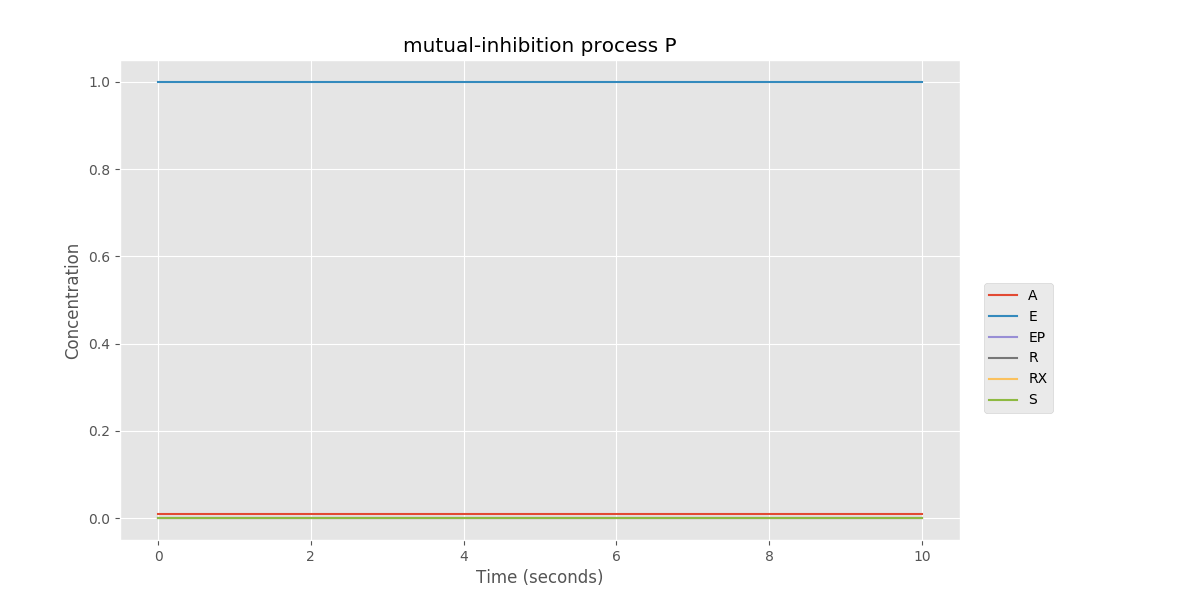

In [5]:
solution = cpi_model.simulate_process('P','odeint', 0, 10, 100)
solution.show_plot()